In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("Telco Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### There are some blank spaces in TotalCharges columns. Replacing these blanks with 0 as total tenure is 0 for these values so no charges are recorded.


In [14]:
df["TotalCharges"].replace(" ", "0",inplace=True)
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [19]:
# Converting 1 and 0 values of senior citizen to yes/no.
df["SeniorCitizen"]=np.where(df.SeniorCitizen==1,"yes","no")

In [20]:
df["SeniorCitizen"].unique()

array(['no', 'yes'], dtype=object)

In [22]:
# Checking for duplicate values
df.duplicated().sum()

0

In [23]:
df["customerID"].duplicated().sum()

0

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
churn_count= df.groupby("Churn",as_index=False).agg(count=('Churn',"count"))
churn_count

,Churn,count
0,No,5174
1,Yes,1869


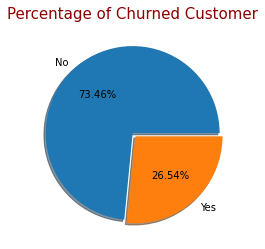

In [43]:
plt.pie(churn_count["count"],labels=churn_count["Churn"],autopct="%0.2f%%", shadow=True,
       explode=[0.0,0.05])
plt.title("Percentage of Churned Customer",color="darkred",fontsize=15)
plt.show()

#### Here from the Pie chart we can conclude that 26.54% of our customer have churned out.
#### Let's explore the reason behind it.

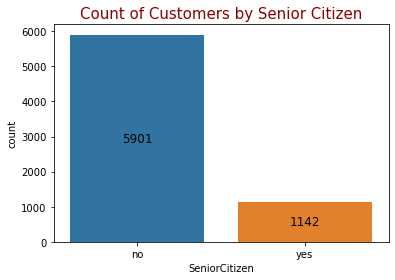

In [138]:
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0],label_type="center",c="k",fontsize=12)
plt.title("Count of Customers by Senior Citizen",color="darkred",fontsize=15)
plt.show()

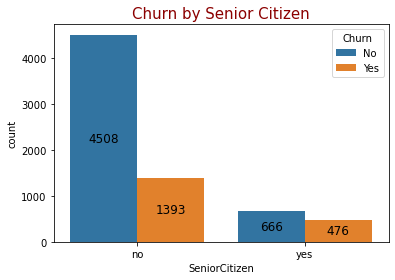

In [137]:
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
ax.bar_label(ax.containers[0],label_type="center",c="k",fontsize=12)
ax.bar_label(ax.containers[1],label_type="center",c="k",fontsize=12)

plt.title("Churn by Senior Citizen",color="darkred",fontsize=15)
plt.show()

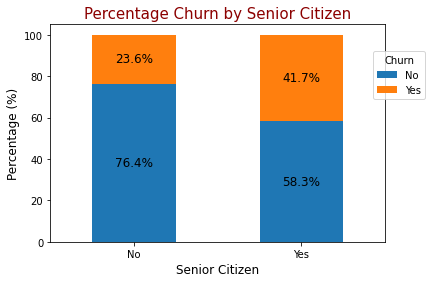

In [92]:
# Create a contingency table to get the counts of each combination
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Normalize the contingency table to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
contingency_table_percentage.plot(kind='bar', stacked=True, ax=ax,)

# Add percentage labels to each section of the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=12, color='k')

# Set title and labels
plt.title("Percentage Churn by Senior Citizen", color="darkred", fontsize=15)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

plt.xticks([0, 1], ['No', 'Yes'], rotation=0)  # Adjusting the labels on x-axis (if needed)
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(0.95,0.9))

plt.show()


#### We can see, comparatively a greater percentage of senior citizen category have churned.

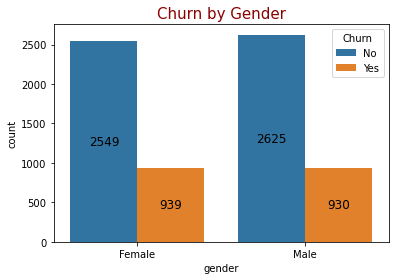

In [93]:
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.countplot(x="gender",data=df,hue="Churn")
ax.bar_label(ax.containers[0],label_type="center",c="k",fontsize=12)
ax.bar_label(ax.containers[1],label_type="center",c="k",fontsize=12)

plt.title("Churn by Gender",color="darkred",fontsize=15)
plt.show()

In [89]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

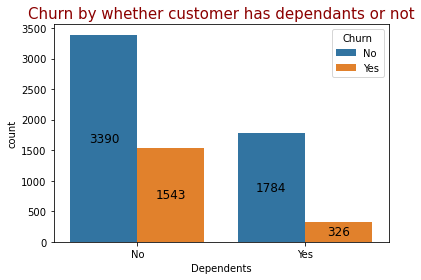

In [94]:
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.countplot(x="Dependents",data=df,hue="Churn")
ax.bar_label(ax.containers[0],label_type="center",c="k",fontsize=12)
ax.bar_label(ax.containers[1],label_type="center",c="k",fontsize=12)

plt.title("Churn by whether customer has dependants or not",color="darkred",fontsize=15)
plt.show()

In [95]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

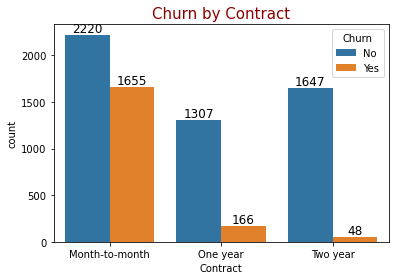

In [99]:
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0],label_type="edge",c="k",fontsize=12)
ax.bar_label(ax.containers[1],label_type="edge",c="k",fontsize=12)

plt.title("Churn by PaymentMethod",color="darkred",fontsize=15)
plt.show()

#### We conclude from the graph that the customers who have month-to-month contract are more likely to churn than the customer with long time contract.

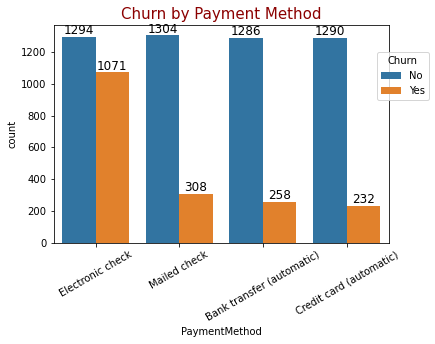

In [118]:
fig, ax = plt.subplots(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0],label_type="edge",c="k",fontsize=12)
ax.bar_label(ax.containers[1],label_type="edge",c="k",fontsize=12)

plt.title("Churn by Payment Method",color="darkred",fontsize=15)
plt.xticks(rotation=30)
plt.legend(title="Churn", bbox_to_anchor=(0.95,0.9))
plt.show()

#### Customer who is using electronic check as payment method is more likely to churn.

In [107]:
df['tenure'].max()

72

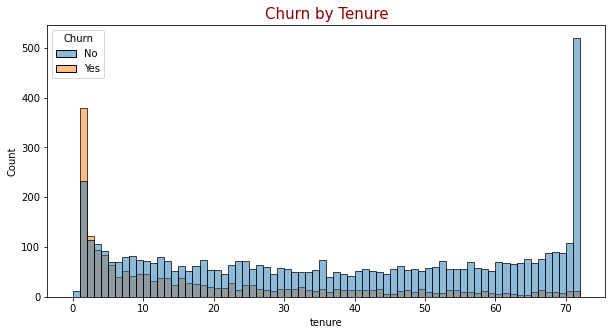

In [109]:
fig = plt.figure(figsize=(10,5))
sns.histplot(x="tenure",data=df,bins=72, hue="Churn")
plt.title("Churn by Tenure",color="darkred",fontsize=15)
plt.show()

#### Customer who used over service for long period have stayed and customers who used our services for 1-5 have churned.

In [121]:
services=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
services

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

[]

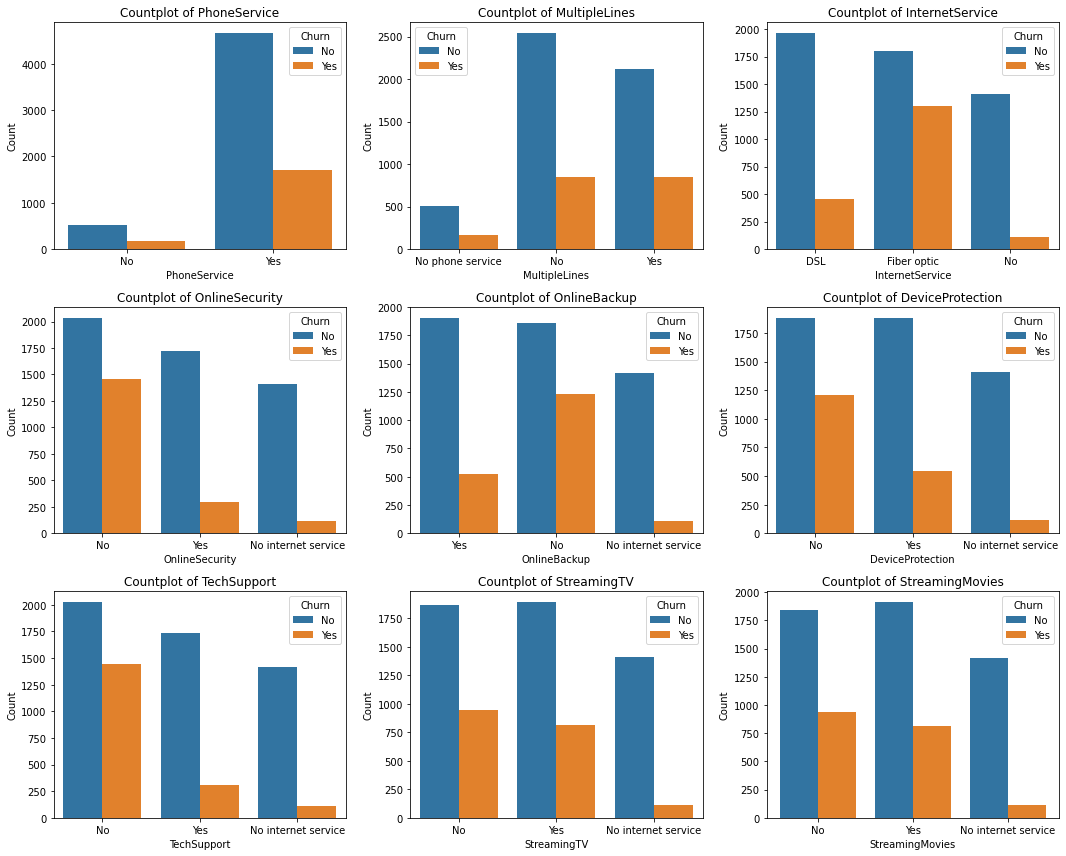

In [136]:
fig, axes = plt.subplots(3,3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(services):
    sns.countplot(x=var, data=df, ax=axes[i],hue="Churn")
    axes[i].set_title(f'Countplot of {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    
plt.tight_layout()
plt.plot()

#### For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled.